In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io    

print(sys.path)


['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/image_notebooks', '/content/drive/MyDrive/image_notebooks']


# Intensity Transformation:

**negative Transform :** converting the black regions to white and vice versa

In [24]:
def negative_image(url):
    img = io.imread(url)
    negative_image = 255 - img

    im_c = cv.hconcat([img, negative_image])
    print()
    cv.imwrite('negative_vconcat.jpg', im_c)
    cv2_imshow(im_c)
    
    cv.waitKey(0)
    cv.destroyAllWindows()
    return 

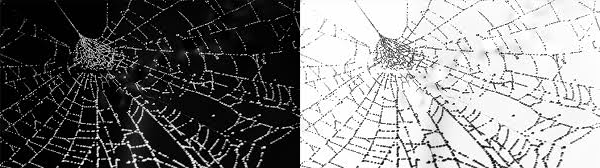

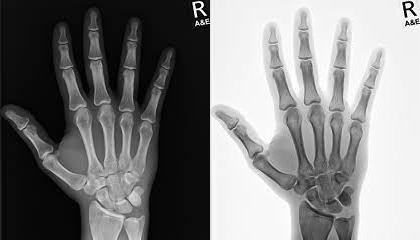

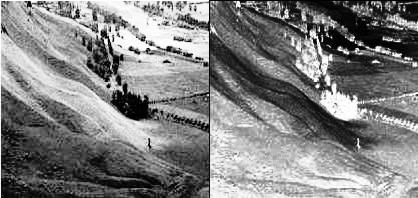

In [25]:
imgs_url= ['images.jfif',
           'download.jfif',
           'wiki2.jpg'
  ]
for url in imgs_url:
  img = io.imread(url)
  cv.imwrite('image.jpg', img)
  negative_image(url)           

 این تبدیل نواحی سیاه را به سفید و بالعکس تبدیل می‌کند . در واقع شدت روشنایی تمامی پیکسل‌ها را از بیشترین مقدار روشنایی کم می‌کند و مقدار شدت روشنایی تمامی پیکسل‌ها عکس مقدار اولیه می‌شوند.


 در تصویر اول با اعمال این تابع تارهای عنکبوت به خوبی نمایش داده شده‌اند.
در تصویر دوم انگشتان دست با تصویر پس‌زمینه ادغام شده و مرزها قابل تشخیص نیستند در حالی که پس از اعمال این تابع، مرزبندی به درستی انجام شده و دست به خوبی قابل روئیت است.
و در تصویر نهایی نقاط تیره تصویر یعنی درختها به شکل ناحیه‌ای به رنگ سفید قابل مشاهده هستند.

**log transform**

In [26]:

def log_image (url):

    img = io.imread(url)
  
    c = 255 / np.log(1+ np.max(img))
    log_image = c *(np.log(img + 1))
    log_image = np.array(log_image, dtype= np.uint8)
    im_c = cv.hconcat([img, log_image])
    cv.imwrite('v_concat.jpg', im_c)
    print()
    cv2_imshow(im_c)

    cv.waitKey(0)
    cv.destroyAllWindows()

    return

<ipython-input-26-8caa5c3a36a9>:6: RuntimeWarning: divide by zero encountered in log
  log_image = c *(np.log(img + 1))


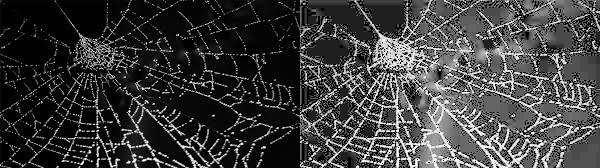

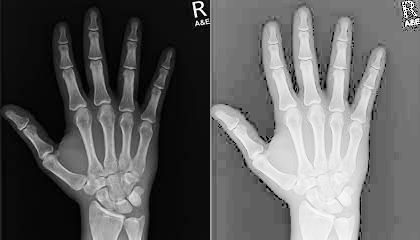

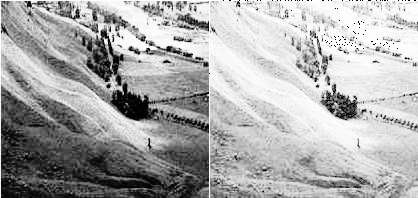

In [27]:
imgs_url= ['image_notebooks/images.jfif',
           'image_notebooks/download.jfif',
           'image_notebooks/wiki2.jpg'                      
  ]
for url in imgs_url:
  img = io.imread(url )  
  cv.imwrite('image.jpg', img)
  log_image(url)

این تبدیل جزئیات تصویر را بیشتر نمایان می‌سازد به گونه‌ای که پیکسل‌های تیره روشنتر می‌شوند 
به عنوان مثال در تصویر اول تصویر پس‌زمینه بعد از اعمال تبدیل تا حدودی قابل مشاهده است در صورتی که در تصویر اصلی نمایان نبود
در تصویر دوم (تصویر دست) پس از اعمال تبدیل محدوده دست به خوبی نمایش داده شده در حالی که در تصویر اصلی بسیاری از پیکسلهای تیره با پس‌زمینه تصویر ادغام شده و مرز تصویر دست با چشم قابل تشخیص نیست.
و در تصویر نهایی نقاط روشن، روشنتر شده و نقاطی از تصویر که درختان به صورت ناحیه‌ تیره به هم متصل دیده می‌شوند روشنتر شده و تاحدودی درختان وضوح بیشتری دارند.

In [28]:

def gamma_img_func(url):
    
    img = io.imread(url)

    for gamma in [0.1, 0.5, 1, 1.5, 2, 2.5]:
        power_law= np.array(255 * ((img / 255)**gamma), dtype = 'uint8' )
        cv.imwrite('gamma_transformed'+str(gamma)+'.jpg', power_law)
        print('the number of gamma is: ' ,gamma)
        cv2_imshow(power_law)

    cv.waitKey(0)
    cv.destroyAllWindows()

    return

the number of gamma is:  0.1


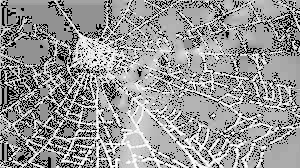

the number of gamma is:  0.5


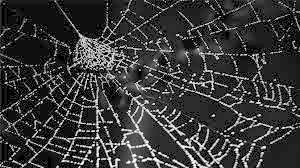

the number of gamma is:  1


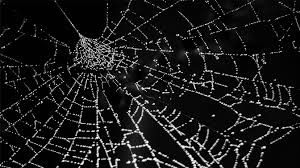

the number of gamma is:  1.5


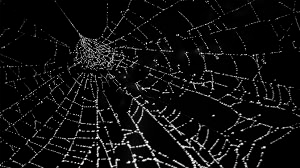

the number of gamma is:  2


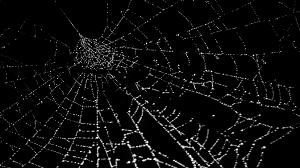

the number of gamma is:  2.5


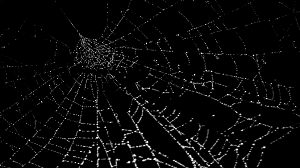

the number of gamma is:  0.1


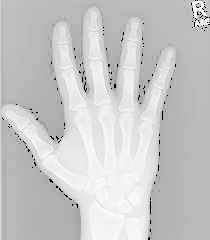

the number of gamma is:  0.5


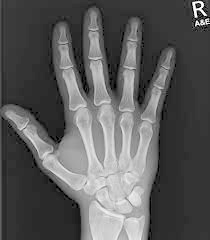

the number of gamma is:  1


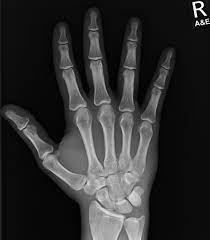

the number of gamma is:  1.5


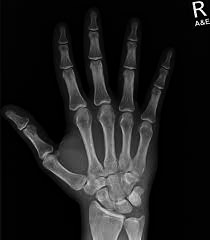

the number of gamma is:  2


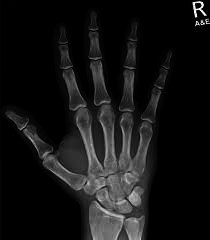

the number of gamma is:  2.5


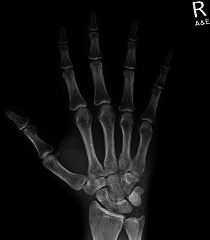

In [29]:
imgs_url= ['image_notebooks/images.jfif',
           'image_notebooks/download.jfif'
                      
  ]
for url in imgs_url:
  img = io.imread(url )   
  cv.imwrite('image.jpg', img)
  gamma_img_func(url)


تبدیل گاما روشنایی تصویر را با استفاده از یک تبدیل غیرخطی تغییر می‌دهد. هر چه گاما بیشتر باشد تصاویر تیره‌تر و هر چه گاما کمتر، تصاویر روشن‌تر می‌شوند

# Piecewise Transform

In [30]:
def piecewise_func(img, r1, s1 , r2, s2):
  flat_img = img.ravel()
  for index, value in enumerate(flat_img):
    if 0 <= value <= r1:
      flat_img[index] = (s1/r1) * value
    elif r1 < value <= r2:
      flat_img[index] = ((s2 - s1)/(r2 - r1)) * (value - r1) + s1 
    else:
      flat_img[index] = ((255 - s2)/(255 - r2)) * (value - r2) + s2
  return np.reshape(flat_img, img.shape)

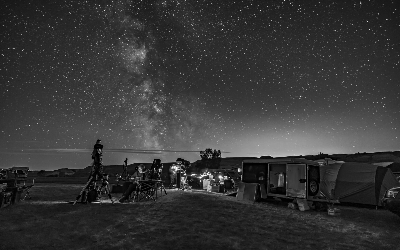

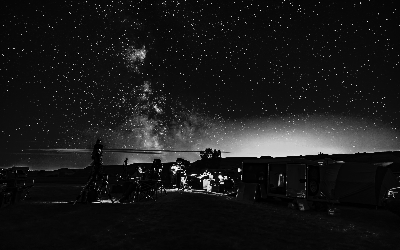

In [31]:
image = cv.imread("image_notebooks/nightsky.jpg", cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (400, 250))
cv2_imshow(image)
print()
# Define parameters.
r1 = 75
s1 = 20
r2 = 153
s2 = 200
img = piecewise_func(image, r1, s1 , r2, s2) 
cv2_imshow(img)

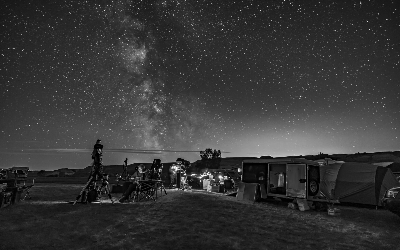

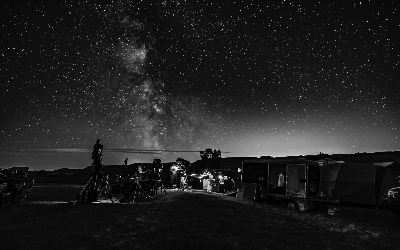

In [32]:
image1 = cv.imread("image_notebooks/nightsky.jpg", cv.IMREAD_GRAYSCALE)
image1 = cv.resize(image1, (400, 250))
cv2_imshow(image1)
print()
# Define parameters.
r1 = 50
s1 = 20
r2 = 190
s2 = 200
img1 = piecewise_func(image1, r1, s1 , r2, s2) 
cv2_imshow(img1)

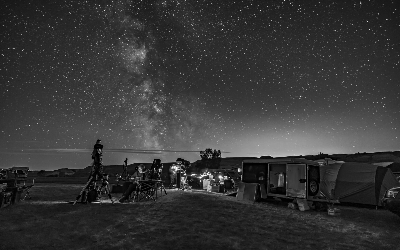

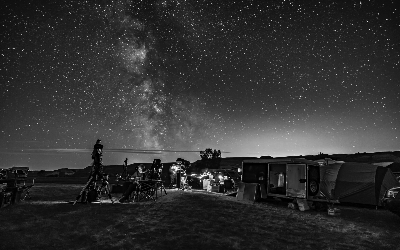

In [33]:
image2 = cv.imread("image_notebooks/nightsky.jpg", cv.IMREAD_GRAYSCALE)
image2 = cv.resize(image2, (400, 250))
cv2_imshow(image2)
print()
# Define parameters.
r1 = 30
s1 = 20
r2 = 179
s2 = 200
img2 = piecewise_func(image2, r1, s1 , r2, s2) 
cv2_imshow(img2)

In [34]:
image3 = cv.imread('image_notebooks/wiki2.jpg', cv.IMREAD_GRAYSCALE)
image3 = cv.resize(image3, (400, 250))
# cv2_imshow(image3)

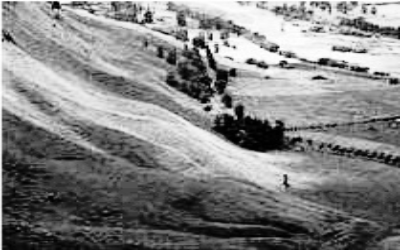

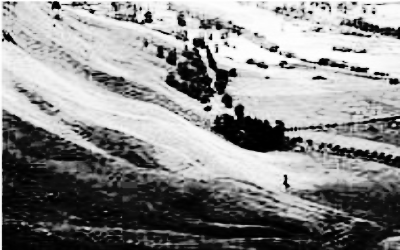

In [35]:
cv2_imshow(image3)
# Define parameters.
r1 = 70
s1 = 20
r2 = 140
s2 = 200
img1_func = piecewise_func(image3, r1, s1 , r2, s2) 


print()
cv2_imshow(img1_func)

در این تبدیل با کشش کنتراست تصویر نقاط تیره تیره‌تر و نقاط روشن روشن‌تر می‌شوند

In [36]:
image4= cv.imread('image_notebooks/wiki2.jpg', cv.IMREAD_GRAYSCALE)
image4 = cv.resize(image4, (400, 250))

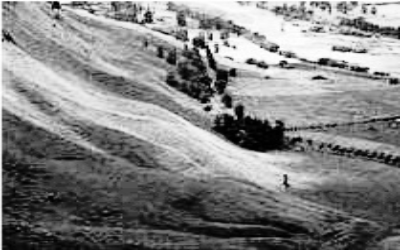

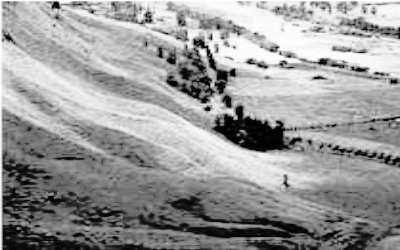

In [37]:

cv2_imshow(image4)
print()
# Define parameters.
r1 = 20
s1 = 20
r2 = 50
s2 = 100
img2_func = piecewise_func(image4, r1, s1 , r2, s2) 
cv2_imshow(img2_func)